In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
import scipy.stats as st
from config import api_key
import time

In [19]:
#2019 Happiness dataframe
Happy_df_2019 = pd.read_csv("Resources/2019_Clean.csv")

#2020 Happiness dataframe
Happy_df_2020 = pd.read_csv("Resources/2020_Clean.csv")

#Merging all data sets together

Merge1920_df = pd.merge(Happy_df_2019,Happy_df_2020, on ="country")

#Merge_df = pd.merge(Merge1518_df,Merge1920_df, on ="country")

happiness_report = Merge1920_df
happiness_report

,country,happiness_score_2019,GDP_per_capita_2019,social_support_2019,life_expectancy_2019,freedom_2019,generosity_2019,corruption_2019,happiness_score_2020,GDP_per_capita_2020,social_support_2020,life_expectancy_2020,freedom_2020,generosity_2020,corruption_2020
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,7.4489,1.338946,1.463646,0.975675,0.613626,0.336318,0.368570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,3.3123,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542
143,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,3.4762,0.457163,0.872675,0.442678,0.509343,0.271541,0.203881
144,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,2.5669,0.300706,0.356434,0.266052,0.000000,0.135235,0.001226
145,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,3.4759,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265


In [20]:
happyscore_byyear = round(happiness_report.filter(['country','happiness_score_2020','happiness_score_2019']),2)
happyscore_byyear.head(10)

,country,happiness_score_2020,happiness_score_2019
0,Finland,7.81,7.77
1,Denmark,7.65,7.60
2,Norway,7.49,7.55
3,Iceland,7.50,7.49
4,Netherlands,7.45,7.49
5,Switzerland,7.56,7.48
6,Sweden,7.35,7.34
7,New Zealand,7.30,7.31
8,Canada,7.23,7.28
9,Austria,7.29,7.25


In [21]:
happyscore_byyear.sort_values(by=['happiness_score_2020'], inplace=True, ascending=False)
happyscore_byyear
happyscore_byyear.head()

,country,happiness_score_2020,happiness_score_2019
0,Finland,7.81,7.77
1,Denmark,7.65,7.60
5,Switzerland,7.56,7.48
3,Iceland,7.50,7.49
2,Norway,7.49,7.55


In [22]:
happyscore_year = happyscore_byyear.rename(columns={'happiness_score_2019': '2019', 'happiness_score_2020': '2020'})
happyscore_year

,country,2020,2019
0,Finland,7.81,7.77
1,Denmark,7.65,7.60
5,Switzerland,7.56,7.48
3,Iceland,7.50,7.49
2,Norway,7.49,7.55
...,...,...,...
145,Central African Republic,3.48,3.08
142,Rwanda,3.31,3.33
137,Zimbabwe,3.30,3.66
146,South Sudan,2.82,2.85


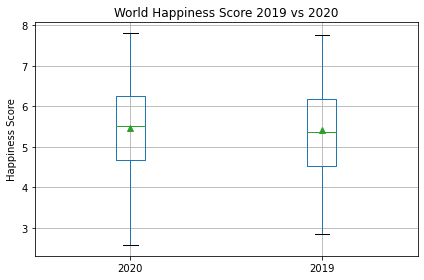

In [23]:
blue_out= dict(markerfacecolor='blue',markersize=12)
box = happyscore_year.boxplot(showmeans=True)
plt.ylabel('Happiness Score')
plt.title('World Happiness Score 2019 vs 2020')
plt.tight_layout()


In [24]:
avg_2019 = happyscore_byyear['happiness_score_2019'].mean()
avg_2020 = happyscore_byyear['happiness_score_2020'].mean()

In [25]:
happyyear_df = round(pd.DataFrame ({"2019": [avg_2019], "2020": [avg_2020]}),2)
happyyear_df

,2019,2020
0,5.41,5.46
